# 4.4.2 Example: South African Heart Disease

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/SAheart/SAheart.data', index_col = 0)
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

# These columns are not used in the book.
df.pop('adiposity')
df.pop('typea')

df_y = df.pop('chd')
df.head()

,sbp,tobacco,ldl,famhist,obesity,alcohol,age
row.names,,,,,,,
1,160,12.00,5.73,1,25.30,97.20,52
2,144,0.01,4.41,0,28.87,2.06,63
3,118,0.08,3.48,1,29.14,3.81,46
4,170,7.50,6.41,1,31.99,24.26,58
5,134,13.60,3.50,1,25.99,57.34,49


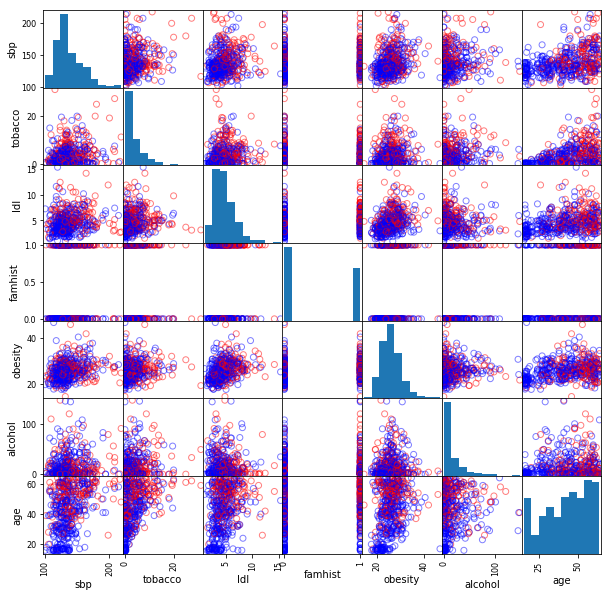

In [2]:
pd.plotting.scatter_matrix(df, marker='O',
                           facecolors = 'none', 
                           edgecolors = df_y.map({0: 'blue', 1: 'red'}),
                           figsize = (10, 10))
plt.show()

In [3]:
class LogisticRegression:
    def predict(X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self._sigmoid(X @ self.beta)
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.beta = np.zeros(X.shape[1])
        
        while True:
            p = self._sigmoid(X @ self.beta)
            W = np.diag(p * (1 - p)) 
            derivative = X.T @ (y - p)
            hessian = -X.T @ W @ X

            if np.allclose(derivative, 0):
                break    
            self.beta -= np.linalg.inv(hessian) @ derivative
        
        self.stderr = np.sqrt(np.diag(np.linalg.inv(-hessian)))
        self.z_score = self.beta / self.stderr
        return self
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

model = LogisticRegression().fit(df.values, df_y.values)

pd.options.display.float_format = '{0:.3f}'.format

pd.DataFrame(data = {'Coefficient': model.beta, 
                     'Std. Error': model.stderr,
                     'Z Score' : model.z_score}, 
             index = ["Intercept", *df.columns.tolist()])

,Coefficient,Std. Error,Z Score
Intercept,-4.130,0.964,-4.283
sbp,0.006,0.006,1.023
tobacco,0.080,0.026,3.034
ldl,0.185,0.057,3.218
famhist,0.939,0.225,4.177
obesity,-0.035,0.029,-1.187
alcohol,0.001,0.004,0.136
age,0.043,0.010,4.181
